# Bibliotecas

In [19]:
# Importação das devidas bibliotecas para o funcionamento e desenvolvimento dos códigos e do projeto
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as st

from collections import Counter
import statistics as static

import statsmodels.api as sm

import warnings
warnings.filterwarnings('ignore')

### **Pandas**
Pandas é uma ferramenta de análise e manipulação de dados de código aberto rápida, poderosa, flexível e fácil de usar, construído sobre a linguagem de programação Python. Além de fornecer estruturas de dados rotuladas semelhantes a objetos R data.frame, funções estatísticas e muito mais (**PANDAS**, 2008)

<br>

### **NumPy**
NumPy é um projeto de código aberto com o objetivo de habilitar a computação numérica com Python. Foi criado em 2005, com base no trabalho inicial das bibliotecas Numeric e Numarray. O NumPy sempre será 100% software de código aberto, gratuito para todos usarem e lançado sob os termos liberais da licença BSD modificada. <br>
É o pacote fundamental para computação científica em Python. É uma biblioteca Python que fornece um objeto array multidimensional, vários objetos derivados (como arrays e matrizes mascarados) e uma variedade de rotinas para operações rápidas em arrays, incluindo matemática, lógica, manipulação de formas, classificação, seleção, E/S , transformadas discretas de Fourier, álgebra linear básica, operações estatísticas básicas, simulação aleatória e muito mais. (**NumPy**, 2005) 

<br>

### **Matplotlib**
Matplotlib é uma biblioteca abrangente para criar visualizações estáticas, animadas e interativas em Python. O Matplotlib torna as coisas fáceis fáceis e as difíceis possíveis. (**Matplotlib**, 2003)

<br>

### **Seaborn**
Seaborn é uma biblioteca para fazer gráficos estatísticos em Python. Ele se baseia no matplotlib e se integra intimamente às estruturas de dados do pandas.<br>
A Seaborn ajuda você a explorar e entender seus dados. Suas funções de plotagem operam em dataframes e arrays contendo conjuntos de dados inteiros e realizam internamente o mapeamento semântico e a agregação estatística necessários para produzir gráficos informativos. (**Seaborn**, 2012)

<br>

### **SciPy**
O SciPy é desenvolvido abertamente no GitHub, por meio do consenso do SciPy e da comunidade científica Python mais ampla. <br>
SciPy (pronuncia-se “Sigh Pie”) é um software de código aberto para matemática, ciências e engenharia. Inclui módulos para estatística, otimização, integração, álgebra linear, transformadas de Fourier, processamento de sinal e imagem, solucionadores de ODE e muito mais. (**SciPy**, 2008)

<br>

### **Collections / Counter**
Collections é um módulo que implementa tipos de dados de contêiner especializados, fornecendo alternativas aos contêineres internos de uso geral do Python: dict, list, set e tuple. <br>
Um Counter é uma subclasse dict para contar objetos hashable. É uma coleção onde os elementos são armazenados como chaves de dicionário e suas contagens são armazenadas como valores de dicionário. As contagens podem ser qualquer valor inteiro, incluindo zero ou contagens negativas. A classe Counter é semelhante a bags ou multisets em outras linguagens
import statistics as static (**Python**, 2008)

<br>

### **Statistics**
Este módulo fornece funções para calcular estatísticas matemáticas de dados numéricos (valores reais). (**Python**, 2008)

<br>

### **Statsmodels**
É um módulo Python que fornece classes e funções para a estimativa de muitos modelos estatísticos diferentes, bem como para a realização de testes estatísticos e exploração de dados estatísticos. Uma extensa lista de estatísticas de resultados está disponível para cada estimador. Os resultados são testados em relação aos pacotes estatísticos existentes para garantir que estejam corretos. O pacote é lançado sob a licença BSD modificada de código aberto. (**Seabold, Skipper, and Josef Perktold**, 2010)

<br>

### **Warnings**
As mensagens de aviso são normalmente emitidas em situações em que é útil alertar o usuário sobre alguma condição em um programa, onde essa condição (normalmente) não garante o levantamento de uma exceção e o encerramento do programa. Por exemplo, pode-se querer emitir um aviso quando um programa usa um módulo obsoleto. (**Python**, 2008)

# Importação os dados

In [2]:
# Importação dos dados através do DataSet da cenipa
dados_cenipa = pd.read_csv('/content/ocorrencias_cenipa.csv')

## Funções compartilhadas



In [3]:
# Adiciona legenda de valor encima das rects
def add_rects_legend(rects, ax):
  for rect in rects:
    height = rect.get_height()
    ax.annotate(
      '{}'.format(height),
      xy=(rect.get_x() + rect.get_width() / 2, height),
      xytext=(0, 3),
      textcoords="offset points",
      ha='center',
      va='bottom'
    )

# Desenvolvimento

### Quais fases do voo das aeronaves são mais perigosas (cruzeiro, subida inicial, aproximação final e etc)

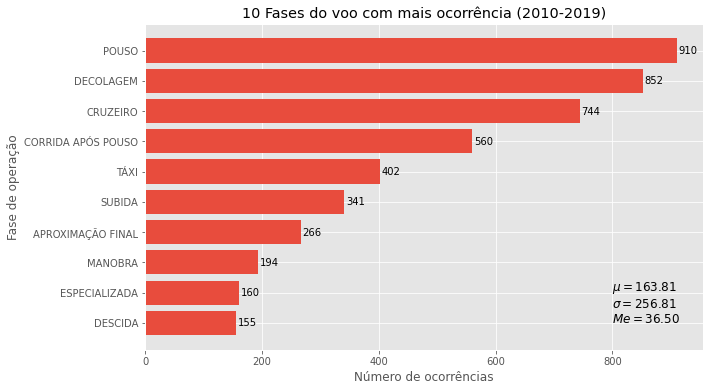

In [4]:
aeronave_fase_operacao = Counter(dados_cenipa['aeronave_fase_operacao'])
aeronave_fases = sorted(aeronave_fase_operacao, key = aeronave_fase_operacao.get, reverse = True)
contador_aeronave_fase_operacao = sorted(list(aeronave_fase_operacao.values()), reverse = True)

# Realiza cálculos matemáticos
mu = np.mean(np.array(contador_aeronave_fase_operacao))
sigma = static.stdev(contador_aeronave_fase_operacao)
mediana = np.median(np.array(contador_aeronave_fase_operacao))

plt.style.use("ggplot")

x = aeronave_fases[:10]
y = contador_aeronave_fase_operacao[:10]

fig, ax = plt.subplots(figsize=(10, 6))
ax.barh(x, y, color='#E84C3D')

for i, v in enumerate(y):
  ax.text(v + 3, i, str(v), va='center')

ax.invert_yaxis()
plt.xlabel('Número de ocorrências')
plt.ylabel("Fase de operação")
plt.title('10 Fases do voo com mais ocorrência (2010-2019)')
ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$\n$Me = {2:.2f}$'.format(mu, sigma, mediana), xy=(800, 9), fontsize=12)

plt.show()


Temos a representação das fases de voo dispostas de maior a menor ocorrência assim como o tipo das ocorrências.

Expressa-se de que a fase na qual observamos maior ocorrências dentre o período disposto foi a de **POUSO** com **910** ocorrências.

Em contrapartida a fase na qual observamos menos ocorrências dentre o período disposto foi a de **DESCIDA** com **155** ocorrências e com valores próximos a disputar o menor valor a de **ESPECIALIZADA** com **160** ocorrências.

Evidencia, estatisticamente, de que obtemos os seguintes valores demonstrativos de média, mediana e desvio padrão. Sendo estes:

**Média: 163.81**

**Mediana: 36.50**

**Desvio Padrão: 256.81**


### Ocorrência de acidentes por Estado

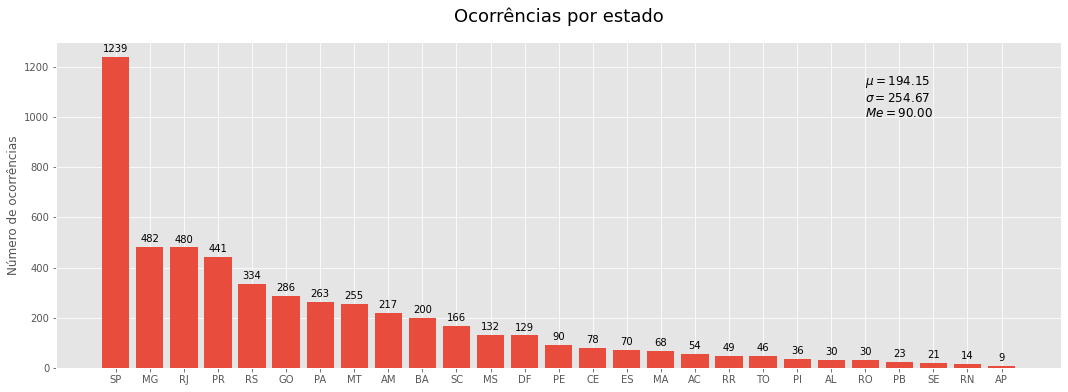

In [5]:
# Realiza contagem de ocorrências por estado
# => Ordena ascendemente o dict e separa as labels dos dados
ocorrencias_por_estado = Counter(dados_cenipa['estado'])
labels_estados = sorted(ocorrencias_por_estado, key=ocorrencias_por_estado.get, reverse=True)
dados_estados = sorted(list(ocorrencias_por_estado.values()), reverse=True)

# Realiza cálculos matemáticos
mu = np.mean(np.array(dados_estados))
sigma = static.stdev(dados_estados)
mediana = np.median(np.array(dados_estados))

plt.style.use("ggplot")

x = labels_estados
y = dados_estados

fig, ax = plt.subplots(figsize=(18, 6))
rects = ax.bar(x, y, color='#E84C3D')
add_rects_legend(rects, ax)

plt.title(label='Ocorrências por estado', loc='Center', pad=20, fontsize=18)
ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$\n$Me = {2:.2f}$'.format(mu, sigma, mediana), xy=(22, 1000), fontsize=12)
plt.ylabel("Número de ocorrências")

plt.show()

Temos a representação de ocorrências por estados do Brasil

Identificamos de que a maior quantidade de ocorrências dão-se ao estado de **SÃO PAULO** na região **SUDESTE** com **1239** dos acontecimentos. Visto conjuntamente de que concentra a maior volumetria de voos que ocorrem no Brasil de acordo com pesquisas e juntamente com os dados dos demais gráficos de regiões (estados e cidades).

Em contrapartida a menor quantidade na qual observamos foi no estado do **AMAPÁ** na região **NORTE** com **9** dos acontecimentos. Visto de que não concentra e há baixa demanda de voos na região.

Evidencia, estatisticamente, de que obtemos os seguintes valores demonstrativos de média, mediana e desvio padrão. Sendo estes:

**Média: 194.15**

**Mediana: 90.00**

**Desvio Padrão: 254.67**

### Ocorrência de acidentes por Estado (porcentagem)

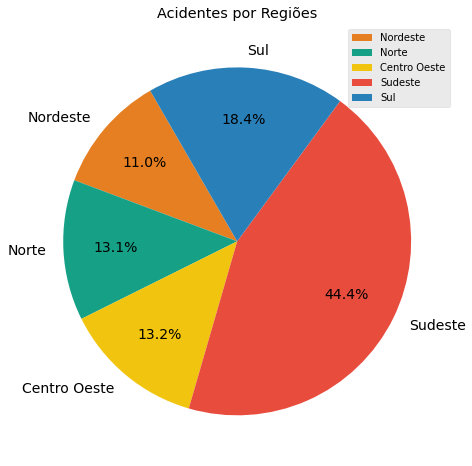

In [6]:
dic_regioes = {
  'Nordeste': ['AL', 'BA', 'CE', 'MA', 'PB', 'PE', 'PI', 'RN', 'SE'],
  'Norte': ['AM', 'RR', 'AP', 'PA', 'TO', 'RO', 'AC'],
  'Centro Oeste': ['MT', 'MS', 'GO'], 
  'Sudeste': ['SP', 'RJ', 'ES', 'MG'],
  'Sul': ['PR', 'RS', 'SC']
}

# Cria dict separado por regiões, com base nos estados de cada região
dados_por_regioes = {j: len([k for k in list(dados_cenipa['estado']) if k in dic_regioes[j]]) for j in dic_regioes.keys()}

plot_colors = ['#E67F22', '#16A086', '#F1C40F', '#E84C3D', '#297FB8']
labels_acidentes_regioes = dados_por_regioes

plt.style.use("ggplot")

plt.figure(figsize=(8, 8))
plt.pie([float(dados_por_regioes[v]) for v in dados_por_regioes], labels=[str(k) for k in dados_por_regioes], colors=plot_colors, autopct='%1.1f%%', pctdistance=0.7, startangle=120, textprops={'fontsize': 14})
plt.legend(labels=labels_acidentes_regioes, loc="upper right")
plt.title(label='Acidentes por Regiões', loc='Center')

plt.show()

Temos a representação da porcentagem de ocorrências por regiões do Brasil, sendo essas o Nordeste, Norte, Centro Oeste, Sudeste e Sul. 

Identificamos de que a maior porcentagem de ocorrências dão-se a região **SUDESTE** com **44.4%** dos acontecimentos. Visto conjuntamente de que concentra a maior volumetria de voos que ocorrem no Brasil como podemos ver nos demais gráficos de regiões (estados e cidades).

As demais porcentagens de ocorrências se distribuem nas demais regiões, conforme citadas acima e estão projetadas pelo gráfico.

### 10 Cidades com mais Ocorrências


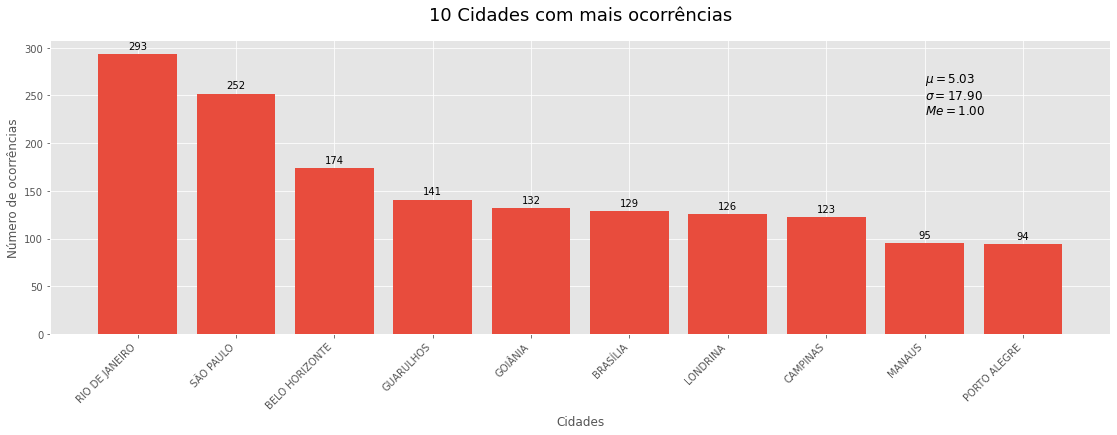

In [7]:
# Realiza contagem de ocorrências por cidade
# => Ordena ascendemente o dict e separa as labels dos dados
ocorrencias_por_cidade = Counter(dados_cenipa['cidade'])
labels_cidades = sorted(ocorrencias_por_cidade, key=ocorrencias_por_cidade.get, reverse=True)
dados_cidades = sorted(list(ocorrencias_por_cidade.values()), reverse=True)

plt.style.use("ggplot")

# Realiza cálculos matemáticos
mu = np.mean(np.array(dados_cidades))
sigma = static.stdev(dados_cidades)
mediana = np.median(np.array(dados_cidades))

# Separa apenas os dez primeiros dados dos arrays
x = labels_cidades[:10]
y = dados_cidades[:10]

fig, ax = plt.subplots(figsize=(19, 6))
fig.autofmt_xdate(rotation=45)
rects = ax.bar(x, y, color='#E84C3D')
add_rects_legend(rects, ax)

plt.title(label='10 Cidades com mais ocorrências', loc='Center', pad=20, fontsize=18)
ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$\n$Me = {2:.2f}$'.format(mu, sigma, mediana), xy=(8, 230), fontsize=12)
plt.xlabel('Cidades')
plt.ylabel("Número de ocorrências")

plt.show()

Temos a representação das 10 cidades com maior ocorrências no Brasil

Identificamos de que a maior quantidade de ocorrências dão-se a cidade do **RIO DE JANEIRO** na região **SUDESTE** com **293** dos acontecimentos. 

Em contrapartida a menor quantidade na qual observamos foi na cidade de **PORTO ALEGRE** com **94** ocorrências e com valores próximos a disputar o menor valor a cidade de **MANAUS** com **95** ocorrências acontecimentos.

Evidencia, estatisticamente, de que obtemos os seguintes valores demonstrativos de média, mediana e desvio padrão. Sendo estes:

**Média: 5.03**

**Mediana: 1.00**

**Desvio Padrão: 17.90**

### Ocorrências de aeronaves por ano

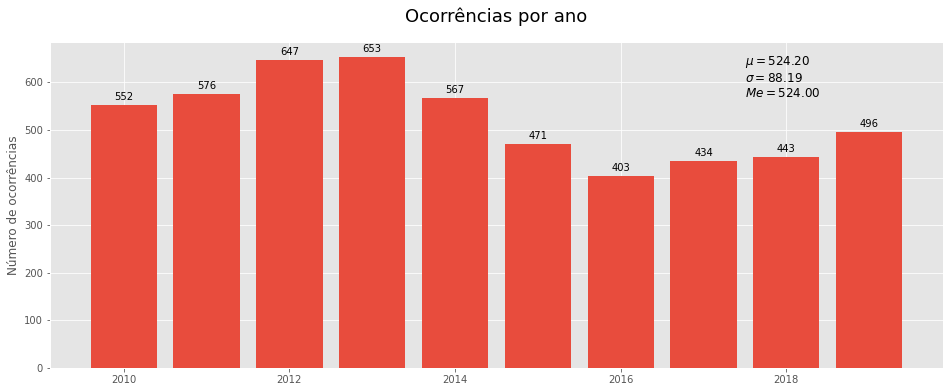

In [8]:
# Realiza contagem de ocorrências por estado
# => Ordena ascendemente o dict e separa as labels dos dados
ocorrencias_por_ano = Counter(dados_cenipa['ano'])

labels_ano = sorted(ocorrencias_por_ano, key=ocorrencias_por_ano.get, reverse=True)
dados_ano = sorted(list(ocorrencias_por_ano.values()), reverse=True)

# Realiza cálculos estatísticos
mu = np.mean(np.array(dados_ano))
sigma = static.stdev(dados_ano)
mediana = np.median(np.array(dados_ano))

plt.style.use("ggplot")

x = labels_ano
y = dados_ano

fig, ax = plt.subplots(figsize=(16, 6))
rects = ax.bar(x, y, color='#E84C3D')
add_rects_legend(rects, ax)

plt.title(label='Ocorrências por ano', loc='Center', fontsize=18, pad=20)
plt.ylabel("Número de ocorrências")
ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$\n$Me = {2:.2f}$'.format(mu, sigma, mediana), xy=(2017.5, 570), fontsize=12)

plt.show()

Temos a representação de ocorrências por ano do Brasil

Identificamos de que a **maior quantidade de ocorrências** dão-se ao ano de **2013** com **653** dos acontecimentos.

Em contrapartida a **menor quantidade** na qual observamos foi no ano de **2016** com **403** dos acontecimentos.

Evidencia, estatisticamente, de que obtemos os seguintes valores demonstrativos de média, mediana e desvio padrão. Sendo estes:

**Média: 524.20**

**Mediana: 524.00**

**Desvio Padrão: 88.19**

### Ocorrências por Tipo de Aeronave

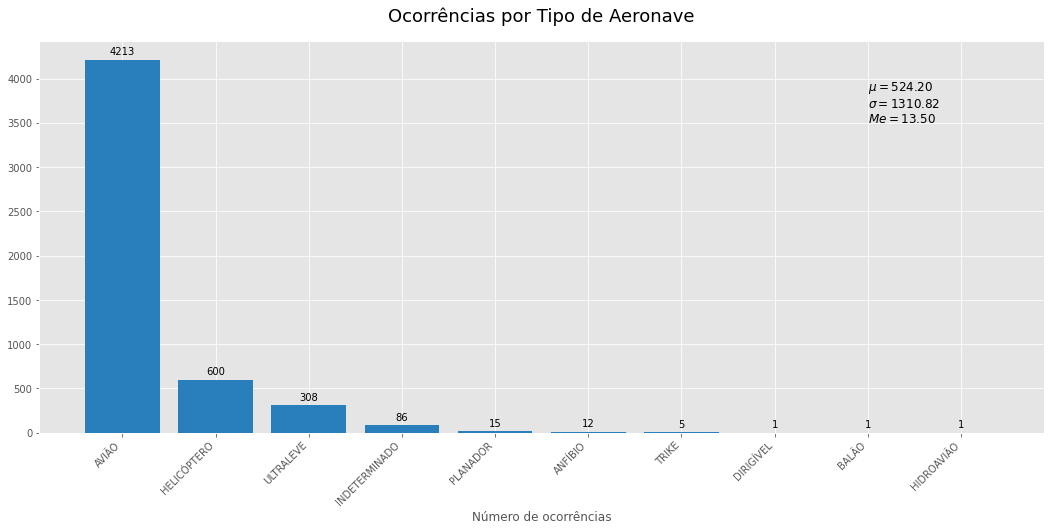

In [9]:
# Realiza contagem de ocorrências por tipo de aeronave
# => Ordena ascendemente o dict e separa as labels dos dados
dados_por_tipo_aeronave = Counter(dados_cenipa['aeronave_tipo'])
labels_tipo_aeronave = sorted(dados_por_tipo_aeronave, key=dados_por_tipo_aeronave.get, reverse=True)
dados_tipo_aeronave = sorted(list(dados_por_tipo_aeronave.values()), reverse=True)

# Realiza cálculos matemáticos
mu = np.mean(np.array(dados_tipo_aeronave))
sigma = static.stdev(dados_tipo_aeronave)
mediana = np.median(np.array(dados_tipo_aeronave))

plt.style.use("ggplot")

x = labels_tipo_aeronave
y = dados_tipo_aeronave

fig, ax = plt.subplots(figsize=(18, 8))
fig.autofmt_xdate(rotation=45)
rects = ax.bar(x, y, color='#297FBB')
add_rects_legend(rects, ax)

plt.title('Ocorrências por Tipo de Aeronave', loc='Center', pad=20, fontsize=18)
plt.xlabel("Número de ocorrências")
ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$\n$Me = {2:.2f}$'.format(mu, sigma, mediana), xy=(8, 3500), fontsize=12)

plt.show()

Temos a representação de ocorrências por tipo de aeronave

Observamos aqui de que a **maior quantidade de ocorrências** dão-se ao tipo de aeronave mais utilizada para voos, o **avião** com **4213** dos acontecimentos.

Em contrapartida as **menores quantidade** na qual observamos foi das aeronaves: **dirigível**, **balão** e **hidroavião** com **1** dos acontecimentos para estes.

Evidencia, estatisticamente, de que obtemos os seguintes valores demonstrativos de média, mediana e desvio padrão. Sendo estes:

**Média: 524.20**

**Mediana: 13.50**

**Desvio Padrão: 1310.82**

### Eventos por ano de fabricação da aeronave

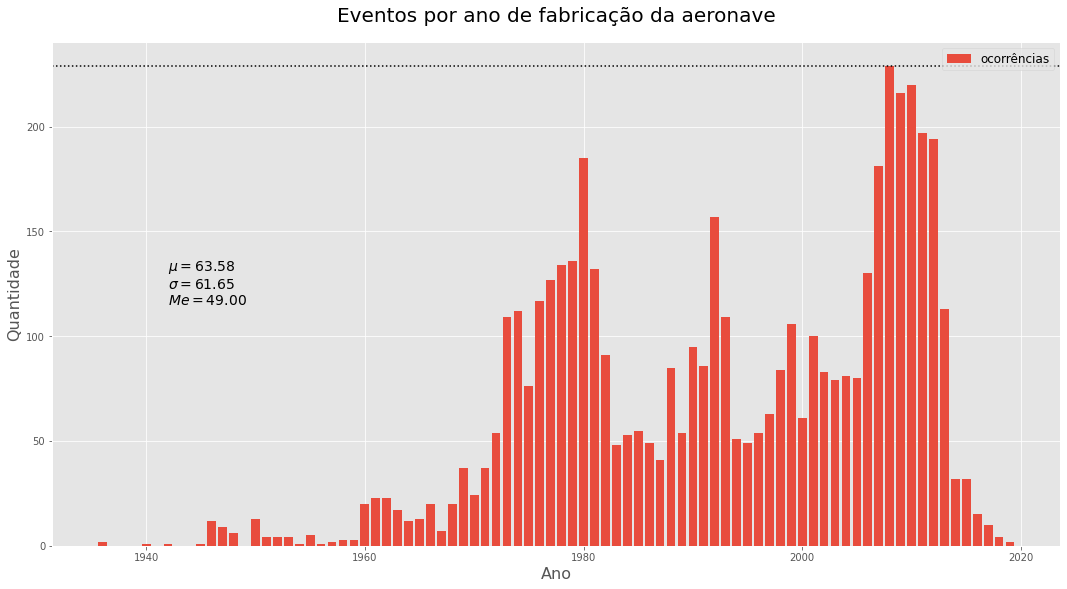

In [10]:
df = dados_cenipa.query('aeronave_ano_fabricacao >= 1936 and aeronave_ano_fabricacao <= 2019')
dados_por_ano_fabricacao = df.groupby('aeronave_ano_fabricacao')

dic = {}

for x in dados_por_ano_fabricacao:
  dic[x[0]] = len(x[1])

df_ano_quantidade = pd.DataFrame(list(dic.items()), columns=['Ano', 'Quantidade'])

mu, sigma, mediana = df_ano_quantidade['Quantidade'].mean(), df_ano_quantidade['Quantidade'].std(), df_ano_quantidade['Quantidade'].median() 

plt.style.use("ggplot")

fig = plt.figure(figsize=(14,7))
eixo = fig.add_axes([0, 0, 1, 1])
eixo.bar(dic.keys(), dic.values(), color='#E84C3D')

x1 = df_ano_quantidade['Ano'][df_ano_quantidade['Quantidade'].idxmax()]
y1 = max(df_ano_quantidade['Quantidade'])
x2 = df_ano_quantidade['Ano'][df_ano_quantidade['Quantidade'].idxmax() - 10]
y2 = max(df_ano_quantidade['Quantidade']) - 30

eixo.set_title('Eventos por ano de fabricação da aeronave', fontsize=20, pad=20)
eixo.set_xlabel('Ano', fontsize=16)
eixo.set_ylabel('Quantidade', fontsize=16)
eixo.legend(['ocorrências'], loc = 'upper right', fontsize=12)
eixo.axhline(max(df_ano_quantidade['Quantidade']), color='k', linestyle=':')

eixo.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$\n$Me = {2:.2f}$'.format(mu, sigma, mediana), xy=(1942, 115), fontsize=14)

plt.show()

Temos a representação de ocorrências por ano de fabricação das aeronaves. Nesta analise, foi trazido o diferencial de uma comparação desde **1936 até 2019**.

Observamos aqui de que um dos **primeiros grande fluxo de quantidade de ocorrências** se dispõe por volta de **1973-1982**. 
Em contrapartida o **segundo grande fluxo, e maior, de quantidade de ocorrências** se dispõe entre **2007-2014**.

Evidencia, estatisticamente, de que obtemos os seguintes valores demonstrativos de média, mediana e desvio padrão. Sendo estes:

**Média: 63.58**

**Mediana: 49.00**

**Desvio Padrão: 61.65**

### Tabela de Tipos de Acidente (Acidentes, Incidentes e Incidentes Graves)

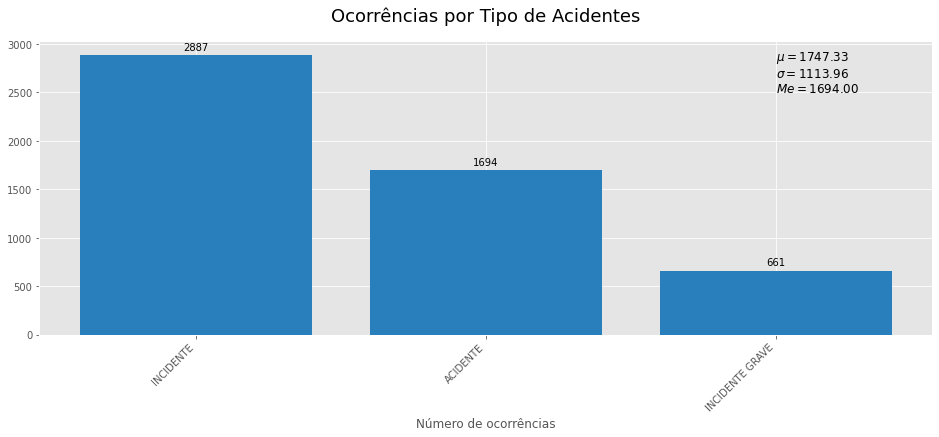

In [11]:
dados_por_tipo_acidente = Counter(dados_cenipa['tipo'])
labels_tipo_acidente = sorted(dados_por_tipo_acidente, key=dados_por_tipo_acidente.get, reverse=True)
dados_tipo_acidente = sorted(list(dados_por_tipo_acidente.values()), reverse=True)

# Realiza cálculos matemáticos
mu = np.mean(np.array(dados_tipo_acidente))
sigma = static.stdev(dados_tipo_acidente)
mediana = np.median(np.array(dados_tipo_acidente))

plt.style.use("ggplot")

x = labels_tipo_acidente
y = dados_tipo_acidente

fig, ax = plt.subplots(figsize=(16, 6))
fig.autofmt_xdate(rotation=45)
rects = ax.bar(x, y, color='#297FBB')
add_rects_legend(rects, ax)

plt.title('Ocorrências por Tipo de Acidentes', loc='Center', pad=20, fontsize=18)
plt.xlabel("Número de ocorrências")
ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$\n$Me = {2:.2f}$'.format(mu, sigma, mediana), xy=(2, 2500), fontsize=12)

plt.show()

Temos a representação de ocorrências por tipo de acidente (incidente, acidente e incidente grave)*.

Observamos aqui de que a **maior quantidade de ocorrências** são consideradas **INCIDENTES** com **2887** dos acontecimentos.

Em contrapartida a **menor quantidade de ocorrências** na qual observamos foi da classificação de **INCIDENTE GRAVE** com **661** dos acontecimentos.

Evidencia, estatisticamente, de que obtemos os seguintes valores demonstrativos de média, mediana e desvio padrão. Sendo estes:

**Média: 1747.33**
**Mediana: 1694.00**
**Desvio Padrão: 1113.96**

<br>

***Obs**: As classificações são dadas pela própria **CENIPA**, sendo a mesma organização que nos disponibilizam estes dados para analizarmos e manipularmos.

### Acidentes e Incidentes ao longo dos anos e por categoria de evento


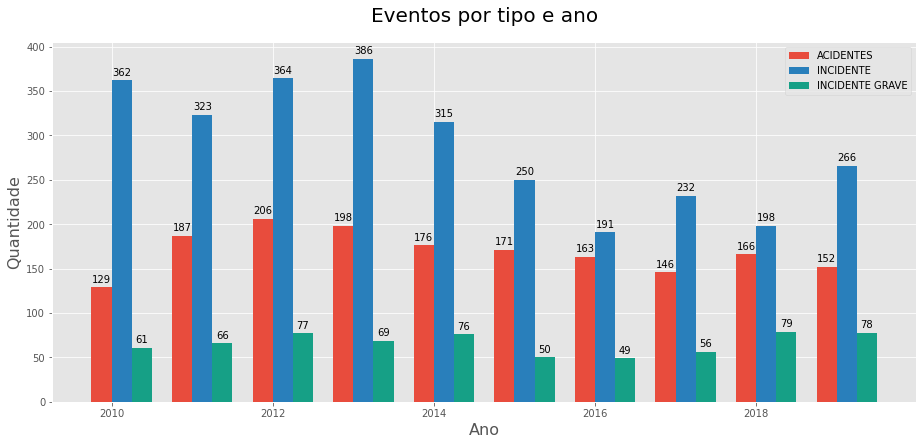

In [12]:
grupos_ano_tipo = dados_cenipa.groupby(['ano', 'tipo'])

dic = {}

for x in grupos_ano_tipo:
  dic[x[0]] = len(x[1])

dados_ano_tipo = pd.DataFrame(pd.Series(dic).reset_index())

anos = dados_cenipa['ano'].unique()
acidentes = dados_ano_tipo.query('level_1 == "ACIDENTE"')
incidente = dados_ano_tipo.query('level_1 == "INCIDENTE"')
incidentes_grave = dados_ano_tipo.query('level_1 == "INCIDENTE GRAVE"')

plt.style.use("ggplot")

fig = plt.figure(figsize=(12,5))
eixo = fig.add_axes([0, 0, 1, 1])
width = 0.25

rects1 = eixo.bar(anos - width/2, acidentes[0], width,label = 'ACIDENTES', color = '#E84C3D')
rects2 = eixo.bar(anos + width/2, incidente[0], width, label = 'INCIDENTE', color = '#297FBB')
rects3 = eixo.bar(anos + width + width/2, incidentes_grave[0], width, label = 'INCIDENTE GRAVE', color = '#16A086')

eixo.set_title('Eventos por tipo e ano', fontsize=20, pad=20)
eixo.set_xlabel('Ano', fontsize=16)
eixo.set_ylabel('Quantidade', fontsize=16)
eixo.legend()

add_rects_legend(rects1, eixo)
add_rects_legend(rects2, eixo)
add_rects_legend(rects3, eixo)

plt.show()

Temos a representação de dados cruzados entre ocorrências por ano e ocorrências por tipo de acidente (incidente, acidente e incidente grave)*.

Observamos aqui de que o **grande fluxo de quantidade de ocorrências** se dispõe em **2013** com os **INCIDENTES** equivalente **386**, os **ACIDENTES** sendo os 2° maior com **198** e **INCIDENTES GRAVES** com **69** das ocorrências. 
Em contrapartida o **menor fluxo de quantidade de ocorrências** se dispõe em **2016** com os **INCIDENTES** em **191**, os **ACIDENTES** com **163** e **INCIDENTES GRAVES** sendo a menor quantia dentre todos os fluxos com **49** das ocorrências.


<br>

***Obs**: As classificações são dadas pela própria **CENIPA**, sendo a mesma organização que nos disponibilizam estes dados para analizarmos e manipularmos.

### Percentual de Ocorrência de Acidentes, Incidentes, Incidentes Graves

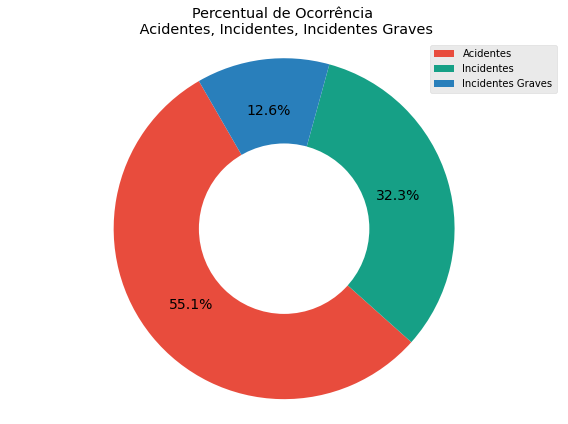

In [13]:
plt.style.use("ggplot")

colors = ['#E84C3D', '#16A086', '#297FBB']
labels_ocorrencia = ['Acidentes', 'Incidentes', 'Incidentes Graves']
plt.figure(figsize=(8, 6))

tipo_ocorrencia = dados_cenipa['tipo'].value_counts()

plt.pie(tipo_ocorrencia, colors=colors, autopct='%1.1f%%', pctdistance=0.7, startangle=120, textprops={'fontsize': 14})
plt.legend(labels=labels_ocorrencia, loc="upper right")
plt.title(label='Percentual de Ocorrência \n Acidentes, Incidentes, Incidentes Graves', loc='Center')
center_circle = plt.Circle((0,0),0.5, color='black', fc='white', linewidth=0)

fig = plt.gcf()
fig.gca().add_artist(center_circle)

plt.axis('equal')
plt.tight_layout()


plt.show()

Temos a representação da porcentagem de ocorrências por tipo de ocorrência (acidentes, incidentes e incidentes graves)*. 

Identificamos de que a **maior porcentagem de ocorrências** dão-se ao tipo de **ACIDENTES** com **55.1%** dos acontecimentos. Por subsequente temos **INCIDENTES** com **32.3%** e por fim **INCIDENTES GRAVES** com **12.6%**.

<br>

***Obs**: As classificações são dadas pela própria **CENIPA**, sendo a mesma organização que nos disponibilizam estes dados para analizarmos e manipularmos.

### Nivel de danos ocorridos nos Acidentes Aéreos em cada ano (2010 à 2019)

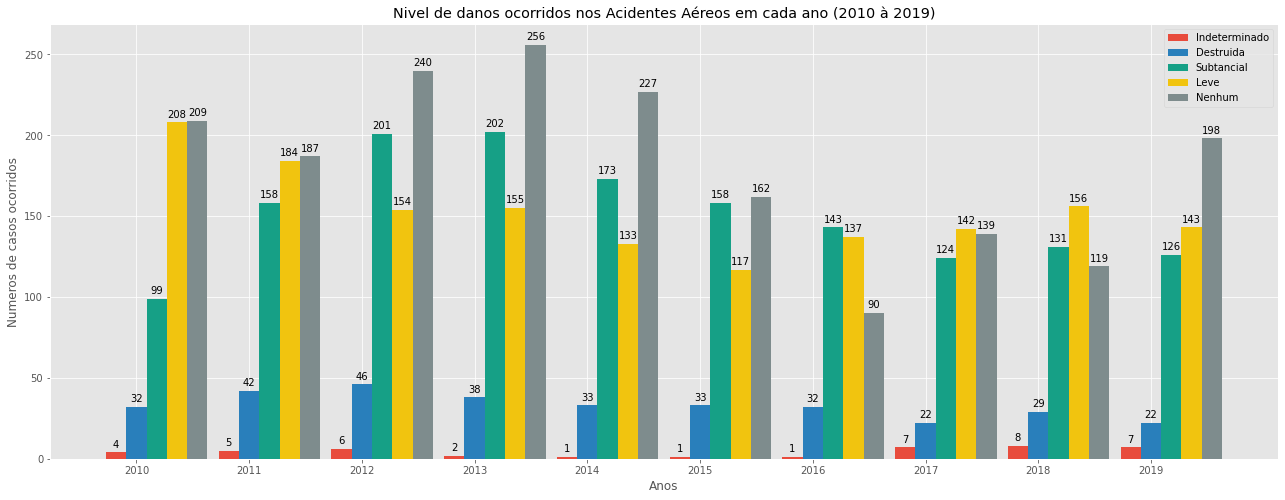

In [14]:
def number_legend(rects, ax): 
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(height),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),  
                    textcoords="offset points",
                    ha='center', va='bottom')   

grupos_ano_nivel = dados_cenipa.groupby(['ano', 'aeronave_nivel_dano'])

dic = {}

for x in grupos_ano_nivel:
  dic[x[0]] = len(x[1])

dados_ano_nivel = pd.DataFrame(pd.Series(dic).reset_index())

anos = dados_cenipa['ano'].unique()

indeterminado = dados_ano_nivel.query('level_1 == "INDETERMINADO"')
destruida = dados_ano_nivel.query('level_1 == "DESTRUÍDA"')
subtancial = dados_ano_nivel.query('level_1 == "SUBSTANCIAL"')
leve = dados_ano_nivel.query('level_1 == "LEVE"')
nenhum = dados_ano_nivel.query('level_1 == "NENHUM"')

w = 0.18

plt.subplots(figsize=(22,8))

bar1 = np.arange(len(anos))
bar2 = [i+w for i in bar1]
bar3 = [i+w for i in bar2]
bar4 = [i+w for i in bar3]
bar5 = [i+w for i in bar4]

rects1 = plt.bar(bar1, indeterminado[0], w, label = "Indeterminado", color="#E84C3D")
rects2 = plt.bar(bar2, destruida[0], w, label = "Destruida", color="#297FBB")
rects3 = plt.bar(bar3, subtancial[0], w, label = "Subtancial", color="#16A086")
rects4 = plt.bar(bar4, leve[0], w, label = "Leve", color="#F1C40F")
rects5 = plt.bar(bar5, nenhum[0], w, label = "Nenhum", color="#7E8C8D")

add_rects_legend(rects1, plt)
add_rects_legend(rects2, plt)
add_rects_legend(rects3, plt)
add_rects_legend(rects4, plt)
add_rects_legend(rects5, plt)

plt.xlabel("Anos")
plt.ylabel("Numeros de casos ocorridos")
plt.title("Nivel de danos ocorridos nos Acidentes Aéreos em cada ano (2010 à 2019)")
plt.xticks(bar1 + w, anos)
plt.legend()


Temos a representação de dados cruzados entre ocorrências por ano e ocorrências por nivel de dano ocorrido nos acidente (indeterminado, destruída, substancial, leve e nenhum)*.


Observamos aqui de que o **grande fluxo de quantidade de ocorrências** se dispõe em **2013** assim como contestado no gráfico anterior de *"Acidentes e Incidentes ao longo dos anos e por categoria de evento"*, visto que o fluxo de maior ocorrência se deu no mesmo período.
De acordo com o fluxo os níveis de dano se dispõe em **NENHUM** equivalendo a **256**, **SUBSTANCIAL** com **202**, **LEVE** com **155**, **DESTRUIDA** com **38** e **INDETERMINADO** com **2** das ocorrências. 

Em contrapartida o **menor fluxo de quantidade de ocorrências** se dispõe em **2016**, assim como visto que o fluxo de menor ocorrência se dá no mesmo período com demonstra e foi explicado no parágrafro anterior sobre as ocorrências.
Dito isto, os niveis de danos se dispõe em **NENHUM** equivalendo a **90**, **SUBSTANCIAL** com **143**, **LEVE** com **137**, **DESTRUIDA** com **32** e **INDETERMINADO** com **1** das ocorrências. 

<br>

***Obs:** As classificações são dadas pela própria **CENIPA**, sendo a mesma organização que nos disponibilizam estes dados para analizarmos e manipularmos.

### Investigações

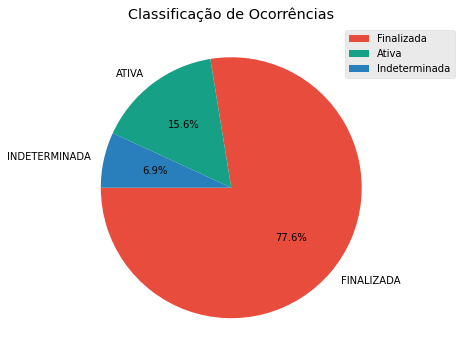

<Figure size 576x576 with 0 Axes>

In [15]:
labels_investigacao = ['Finalizada', 'Ativa', 'Indeterminada']

plt.style.use("ggplot")

colors = ['#E84C3D', '#16A086', '#297FBB']
dados_cenipa['status_investigacao'].value_counts().plot(kind='pie', autopct='%1.1f%%', title="Classificação de Ocorrências", label='', colors=colors, startangle=180, figsize=(8, 6))

plt.legend(labels=labels_investigacao, loc='upper right', bbox_to_anchor=(1.2, 1))
plt.figure(figsize=(8, 8))

plt.show()

Temos a representação dos status da investigação de ocorrências denominadas por: Ativa, Finalizada e Indeterminada*.

Identificamos de que a **maior porcentagem do status das ocorrências** dão-se ao tipo de **FINALIZADA** com **77.6%** das investigações. Por subsequente temos as investigações **ATIVA** com **15.6%** e por fim investigações **INDETERMINADA** com **6.9%**.

<br>

***Obs**: As classificações dos status são dadas pela própria **CENIPA**, sendo a mesma organização que nos disponibilizam estes dados para analizarmos e manipularmos.

### Ocorrências de aeronaves por quantidade de assento

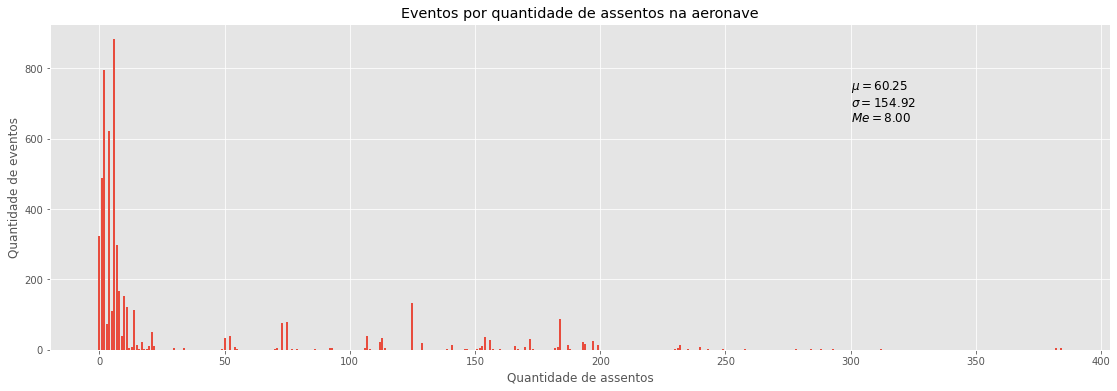

In [16]:
dados_por_quantidade_assento = dados_cenipa.groupby('aeronave_assentos')

dic = {}

for x in dados_por_quantidade_assento:
  dic[x[0]] = len(x[1])

df_dados_por_quantidade_assento = pd.DataFrame(list(dic.items()), columns=['Qtd. Eventos', 'Qtd. Assentos'])
mu, sigma, mediana = df_dados_por_quantidade_assento['Qtd. Assentos'].mean(), df_dados_por_quantidade_assento['Qtd. Assentos'].std(), df_dados_por_quantidade_assento['Qtd. Assentos'].median() 

plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(19, 6))
plt.bar(dic.keys(), dic.values(), color="#E84C3D")
plt.xlabel('Quantidade de assentos')
plt.ylabel('Quantidade de eventos')
plt.title('Eventos por quantidade de assentos na aeronave')
ax.annotate('$\mu = {0:.2f}$\n$\sigma = {1:.2f}$\n$Me = {2:.2f}$'.format(mu, sigma, mediana), xy=(300, 650), fontsize=12)

plt.show()

### Regressão Linear de número de assentos

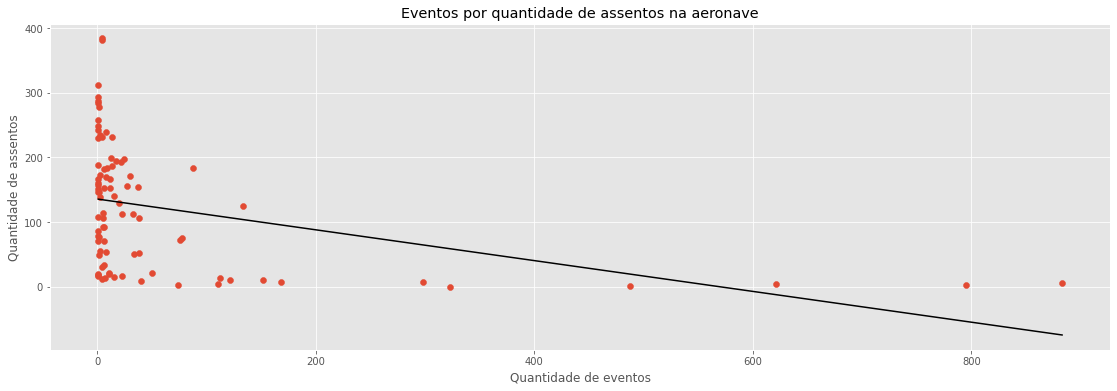

In [17]:
aeronave_assentos = Counter(dados_cenipa['aeronave_assentos'])
fase_aeronave_assentos = sorted(aeronave_assentos, key = aeronave_assentos.get, reverse = True)
contador_aeronave_assentos = sorted(list(aeronave_assentos.values()), reverse = True)

dataframe = pd.DataFrame()
dataframe['y'] = fase_aeronave_assentos
dataframe['x'] = contador_aeronave_assentos
x_values = dataframe[['x']]
y_values = dataframe[['y']]

plt.style.use("ggplot")

fig, ax = plt.subplots(figsize=(19, 6))

plt.scatter(dataframe['x'].values, dataframe['y'].values)
fit = np.polyfit(dataframe['x'].values, dataframe['y'].values, 1)
reta = np.poly1d(fit)
plt.plot(dataframe['x'].values, reta(dataframe['x'].values), 'k')

plt.title('Eventos por quantidade de assentos na aeronave')
plt.ylabel('Quantidade de assentos')
plt.xlabel('Quantidade de eventos')

plt.show()

In [18]:
X = dataframe.x
y = dataframe.y

X2 = sm.add_constant(X)
est = sm.OLS(y, X2)
est2 = est.fit()
print(est2.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.147
Model:                            OLS   Adj. R-squared:                  0.137
Method:                 Least Squares   F-statistic:                     14.64
Date:                Fri, 27 May 2022   Prob (F-statistic):           0.000247
Time:                        20:54:27   Log-Likelihood:                -513.34
No. Observations:                  87   AIC:                             1031.
Df Residuals:                      85   BIC:                             1036.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        135.6941     10.293     13.183      0.0

Temos a representação do eixo X como a quantidade de ocorrências, o eixo Y do gráfico representa a quantidade de assentos das aeronaves.
Observamos que o número de assentos foi decaindo pois à medida que foram tendo mais ocorrências, o número de assentos foi diminuindo.

Analisando os pontos vermelhos nos quais representam às ocorrências devido aos assentos, observamos de que quanto menor for o número de assentos, maior a quantidade de ocorrências.

Temos a representação logo após de **OLS Regression Results** 
A regressão de mínimos quadrados ordinários (OLS) nos auxilia a estimar os  coeficientes de equações de **regressão linear** que descrevem a relação entre uma ou mais variáveis ​​quantitativas independentes e uma variável dependente(**assentos x eventos** no nosso caso).
A equação para tal calculo se dá como:

$\hat{y} = \theta_0 + \theta_1 x_1 + \theta_2 x_2 + \dots \theta_n x_n$

<br>

$\hat{y}$ - valor previsto

$\theta$ - parâmetro do modelo

$n$ - número de atributos (*features*)

$x_i$ - o valor do *inésimo* atributo (*feature*)


# Relatório Final


O objetivo deste projeto foi abordar a análise e desenvolvimento dos dados fornecidos sobre os acidentes aereos ocorridos no Brasil de 2010 à 2019. Ademais a abordagem de resultados dos desenvolvimentos e análise deste estudo de forma ilustrativa.

Examinando as analises realizadas nas quais ampliaram nosso conhecimento dos dados recolhidos, podemos verificar que a quantidade de ocorrências e aeronaves, sem reconhecer o que ocorreu. Ao lidar com as informações, percebeu-se que a maioria dos casos foi provocada por variáveis ​​externas e, na maioria das vezes, praticamente não houve danos ao avião. 

Em síntese, tivemos a opção de expor certos atributos nos eventos das ocorrências, sendo esses os elementos que causaram grande parte das ocorrências de incidentes, incidentes graves e acidentes, juntamente com dados estatísticos de média, mediana e desvio padrão desses dados trabalhados de ocorrências. Dissertamos em alguns temas como as ocorrências de deram durante períodos de tempo e espaço como por ano, por cidade, por regiões, também por tipos de situações em espeficias como tipo de aeronaves, fabricação, os níveis de dano causados, investigações, quantidade de assentos e sua regressão linear.

Evidências deste estudo sugerem a fundamental importância de analisarmos, compreendermos e dissertarmos sobre as ocorrências trazidas nos dados pelo CENIPA. Mais amplamente, pesquisas e projetos comos estes também são necessários para determinar e até mesmo predizer certas ocorrências, assim causando chances de maior prevenção para futuras ocorrências.

Desse modo, esforços contínuos são necessários para tornar mais acessível o compartilhamento de informações detalhadas sobre ocorrências com aeronaves e a discussão desse assunto. 


# Referências Bibliográficas

PYTHON. Python: **Collections — Tipos de dados do contêiner**. [S.I.], [?], Disponível em:
<<https://docs.python.org/3/library/collections.html>>. Acesso em: 13 de abr. 2022

PYTHON. Python: **Statistics — Funções estatísticas**. [S.I.], [?], Disponível em:
<<https://docs.python.org/3/library/statistics.html>>. Acesso em: 13 de abr. 2022

PANDAS. Pandas: **Poderoso kit de ferramentas de análise de dados Python**. Página inicial. [S.I.], [?], Disponível em:
<<https://pandas.pydata.org/>>. Acesso em: 13 de abr. 2022

PANDAS. Pandas: **Repositório do GitHub**. [S.I.], [?], Disponível em:
<<https://github.com/pandas-dev/pandas>>. Acesso em: 13 de abr. 2022

NUMPY. NumPy: **NumPy is the fundamental package for scientific computing in Python**. Página Documentação. [S.I.], [?], Disponível em:
<<https://numpy.org/doc/stable/>>. Acesso em: 13 de abr. 2022

MATPLOTLIB. Matplotlib: **Visualization with Python**. Página Inicial. [S.I.], [?]. Disponível em:
<<https://matplotlib.org/>>. Acesso em: 13 de abr. 2022

SEABORN. Seaborn: **Statistical data visualization**. Página Inicial. [S.I.], [?]. Disponível em:
<<https://seaborn.pydata.org/index.html>>. Acesso em: 13 de abr. 2022

SEABORN. Seaborn: **An introduction to seaborn**. Página Introdutória. [S.I.], [?]. Disponível em:
<<https://seaborn.pydata.org/introduction.html>>. Acesso em: 13 de abr. 2022

SCIPY. SciPy: **Repositório do GitHub**. [S.I.], [?], Disponível em:
<<https://github.com/scipy/scipy/blob/main/README.rst>>. Acesso em: 13 de abr. 2022

SCIPY. SciPy: **Sobre Nós**. [S.I.], [?], Disponível em:
<<https://scipy.org/about/>>. Acesso em: 13 de abr. 2022

MEDIUM. Medium: **Better visualization of Pie charts by MatPlotLib**. [S.I.], [?], Disponível em: <https://medium.com/@kvnamipara/a-better-visualisation-of-pie-charts-by-matplotlib-935b7667d77f>. Acesso em: 13 de abr. 2022

CENIPA. Cenipa: **Ocorrencias Aeronauticas da aviação civil brasileira**. [S.I.], [?], Disponível em: <https://dados.gov.br/dataset/ocorrencias-aeronauticas-da-aviacao-civil-brasileira>. Acesso em: 13 de abr. 2022

STATSMODELS. Statsmodels: **Statistical models, hypothesis tests, and data exploration**. Página Inicial. [S.I.], [?], Disponível em:
<<https://www.statsmodels.org/stable/index.html#>>. Acesso em: 22 de mai. 2022

